In [6]:
from os.path import realpath
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import join as join
import seaborn as sns
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os

In [7]:
activation = "sigmoid"

In [8]:
SIZE = 256

In [9]:
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())


x = feature_extractor.output  
x = Dense(256, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(6, activation = 'sigmoid')(x)

cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 256, 256, 3)]    0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0   

In [10]:
df_interno = pd.read_csv('./df_interno.csv')

In [11]:
df_interno.replace({"CLASSE":[6, 7]}, 5, inplace=True)

In [12]:
df_interno

,CLASSE,VIGOR,0,1,2,3,4,5,6,7,...,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
0,4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,5,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,5,1,0.392157,0.380392,0.439216,0.415686,0.403922,0.466667,0.403922,0.400000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,3,0,0.000000,0.000000,0.000000,0.352941,0.301961,0.364706,0.290196,0.262745,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,4,1,0.000000,0.000000,0.000000,0.294118,0.247059,0.305882,0.286275,0.247059,...,0.0,0.0,0.0,0.0,0.298039,0.258824,0.321569,0.301961,0.27451,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
446,4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
447,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
448,5,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [13]:
vigor = df_interno['VIGOR']

In [14]:
classe = df_interno['CLASSE']

In [15]:
classe.unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [16]:
df_interno.drop(['CLASSE', 'VIGOR'], axis = 1, inplace=True)

In [17]:
df_interno.shape

(450, 196608)

In [18]:
df_interno = df_interno.to_numpy()

In [20]:
df_interno = np.reshape(df_interno, (450, 256, 256, 3))

In [21]:
classe = classe.to_numpy()

In [22]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split

In [23]:
from keras.utils import to_categorical



In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_interno, classe, test_size=0.25)

In [25]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [26]:
y_test_one_hot.shape

(113, 6)

In [27]:
y_train_one_hot.shape

(337, 6)

Epoch 1/1000
11/11 [==============================] - 48s 4s/step - loss: 3.2492 - accuracy: 0.5223 - val_loss: 2.5652 - val_accuracy: 0.5487
Epoch 2/1000
11/11 [==============================] - 47s 4s/step - loss: 1.8815 - accuracy: 0.6024 - val_loss: 1.7382 - val_accuracy: 0.5487
Epoch 3/1000
11/11 [==============================] - 45s 4s/step - loss: 1.4362 - accuracy: 0.6053 - val_loss: 1.4383 - val_accuracy: 0.5487
Epoch 4/1000
11/11 [==============================] - 47s 4s/step - loss: 1.2422 - accuracy: 0.6053 - val_loss: 1.2696 - val_accuracy: 0.5487
Epoch 5/1000
11/11 [==============================] - 46s 4s/step - loss: 1.1319 - accuracy: 0.6113 - val_loss: 1.1870 - val_accuracy: 0.5487
Epoch 6/1000
11/11 [==============================] - 40s 4s/step - loss: 1.0944 - accuracy: 0.6202 - val_loss: 1.1432 - val_accuracy: 0.5487
Epoch 7/1000
11/11 [==============================] - 40s 4s/step - loss: 1.0791 - accuracy: 0.6024 - val_loss: 1.2789 - val_accuracy: 0.2566
Epoch 

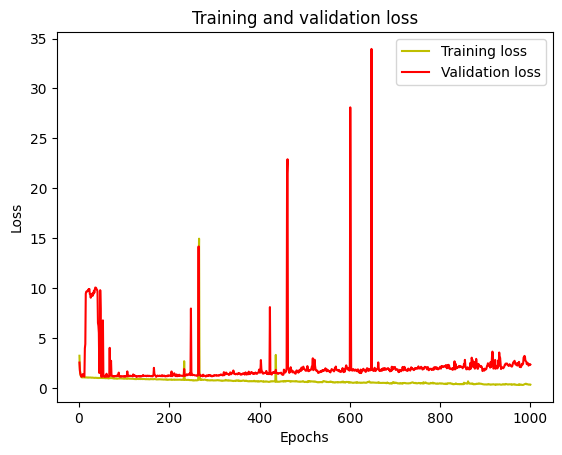

In [28]:

history = cnn_model.fit(X_train, y_train_one_hot, epochs=1000, validation_data = (X_test, y_test_one_hot))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [39]:
from classificadores import *

In [30]:
X_for_RF = feature_extractor.predict(X_train) #This is out X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(X_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)

4/4 [==============================] - 2s 506ms/step


In [31]:

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.5752212389380531


In [32]:
X_for_RF = feature_extractor.predict(df_interno)

15/15 [==============================] - 9s 562ms/step


In [33]:
ramdomForestClassificator(X_for_RF, classe, 5)

--Classificator--
The classificator is: RF
0.5644 accuracy with a standard deviation of 0.0435
0.1658 precision with a standard deviation of 0.0420
0.2236 recall with a standard deviation of 0.0229
0.1778 F1 with a standard deviation of 0.0254
-----------------------------------------------------------
Random Forest, Hold out, Acc =  0.6444444444444445
-----------------------------------------------------------


In [40]:
naivesBayesClassificator(X_for_RF, classe, 5)

--Classificator--
The classificator is: GNB
0.4556 accuracy with a standard deviation of 0.0531
0.2602 precision with a standard deviation of 0.0830
0.2282 recall with a standard deviation of 0.0312
0.2224 F1 with a standard deviation of 0.0395
-----------------------------------------------------------
Gaussian Naive Bayes, Hold out, Acc =  0.7044444444444444
-----------------------------------------------------------


In [35]:
svmclassificator(X_for_RF, classe, 5)

--Classificator--
The classificator is: SVM
0.5651 accuracy with a standard deviation of 0.0078
0.1302 precision with a standard deviation of 0.0156
0.2300 recall with a standard deviation of 0.0245
0.1662 F1 with a standard deviation of 0.0191
-----------------------------------------------------------
SVM, Hold out, Acc =  0.6444444444444445
-----------------------------------------------------------


In [36]:
mlpclassificator(X_for_RF, classe, 5)

--Classificator--
The classificator is: MLP
0.3074 accuracy with a standard deviation of 0.1951
0.1459 precision with a standard deviation of 0.1340
0.2473 recall with a standard deviation of 0.0348
0.1289 F1 with a standard deviation of 0.0724
-----------------------------------------------------------
Saída da rede:	 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 3 4 4 4 4 3 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 3 4 4 4 4 4 2 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Saída desejada:	 [4 4 2 2 4 2 4 4 3 5 4 4 3 4 4 4 4 3 2 4 4 4 3 3 4 4 2 4 4 4 4 3 4 4 4 5 4
 4 4 4 4 4 3 3 4 3 2 4 4 2 4 4 2 4 4 3 4 3 4 4 4 3 4 4 4 4 2 4 3 4 4 4 4 4
 4 2 4 4 3 4 4 3 4 4 3 5 5 4 3 3 4 4 3 4 4 4 4 4 4 1 2 4 4 4 2 4 2 4 5 5 3
 2 4 4 4 4 4 3 4 4 4 1 4 2 4 2 5 3 3 4 4 4 4 4 4 3 3 4 4 2 3 3 4 5 4 4 

In [37]:
adaBoostClassificator(X_for_RF, classe, 5)

KeyboardInterrupt: 